In [1]:
#Importing Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

In [2]:
#Importing dataset

df = pd.read_csv("dataset/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop('Address', axis=1)

In [7]:
df = pd.DataFrame(df)

<h3><b>Exploratory Data Analysis</b></h3>

c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3500x1750 with 0 Axes>

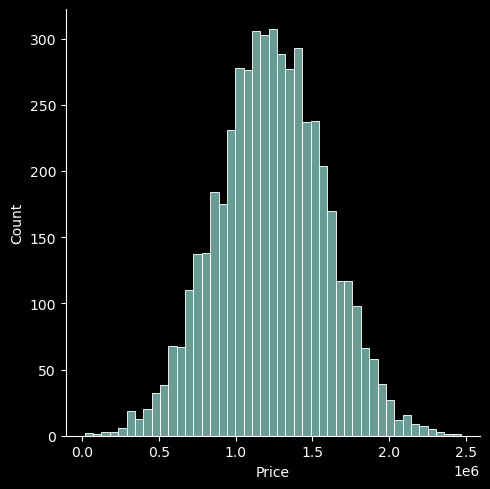

In [8]:
plt.style.use('dark_background')

#Price 
plt.figure(figsize=(14,7), dpi=250)
sns.displot(df.Price)

c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg. Area Income', ylabel='Price'>

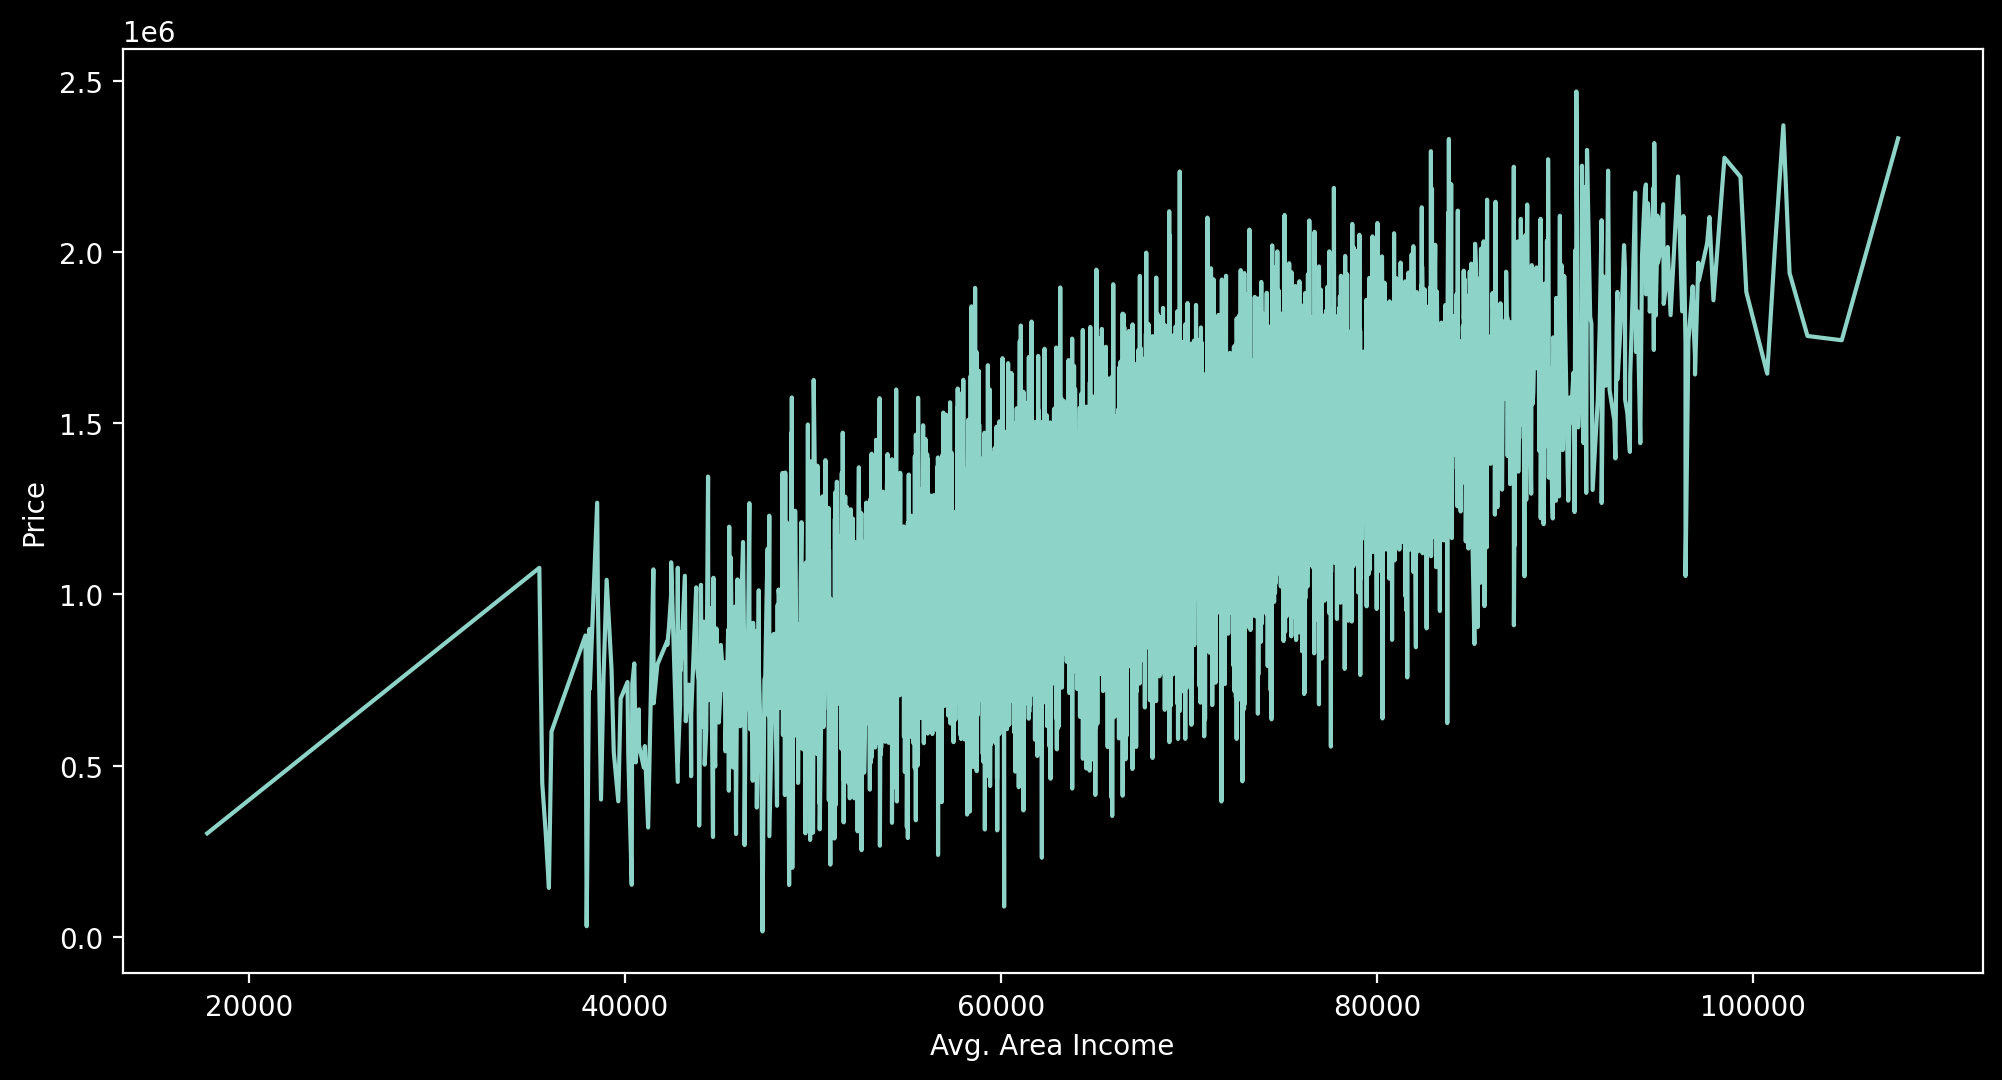

In [9]:

plt.figure(figsize = (12, 6), dpi = 200)
sns.lineplot(x = 'Avg. Area Income', y = 'Price', data = df)

C:\Users\ankit\AppData\Local\Temp\ipykernel_23560\4117059013.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Avg. Area House Age', y= 'Price', data = df, palette='Set2', ci = None)


<Axes: xlabel='Avg. Area House Age', ylabel='Price'>

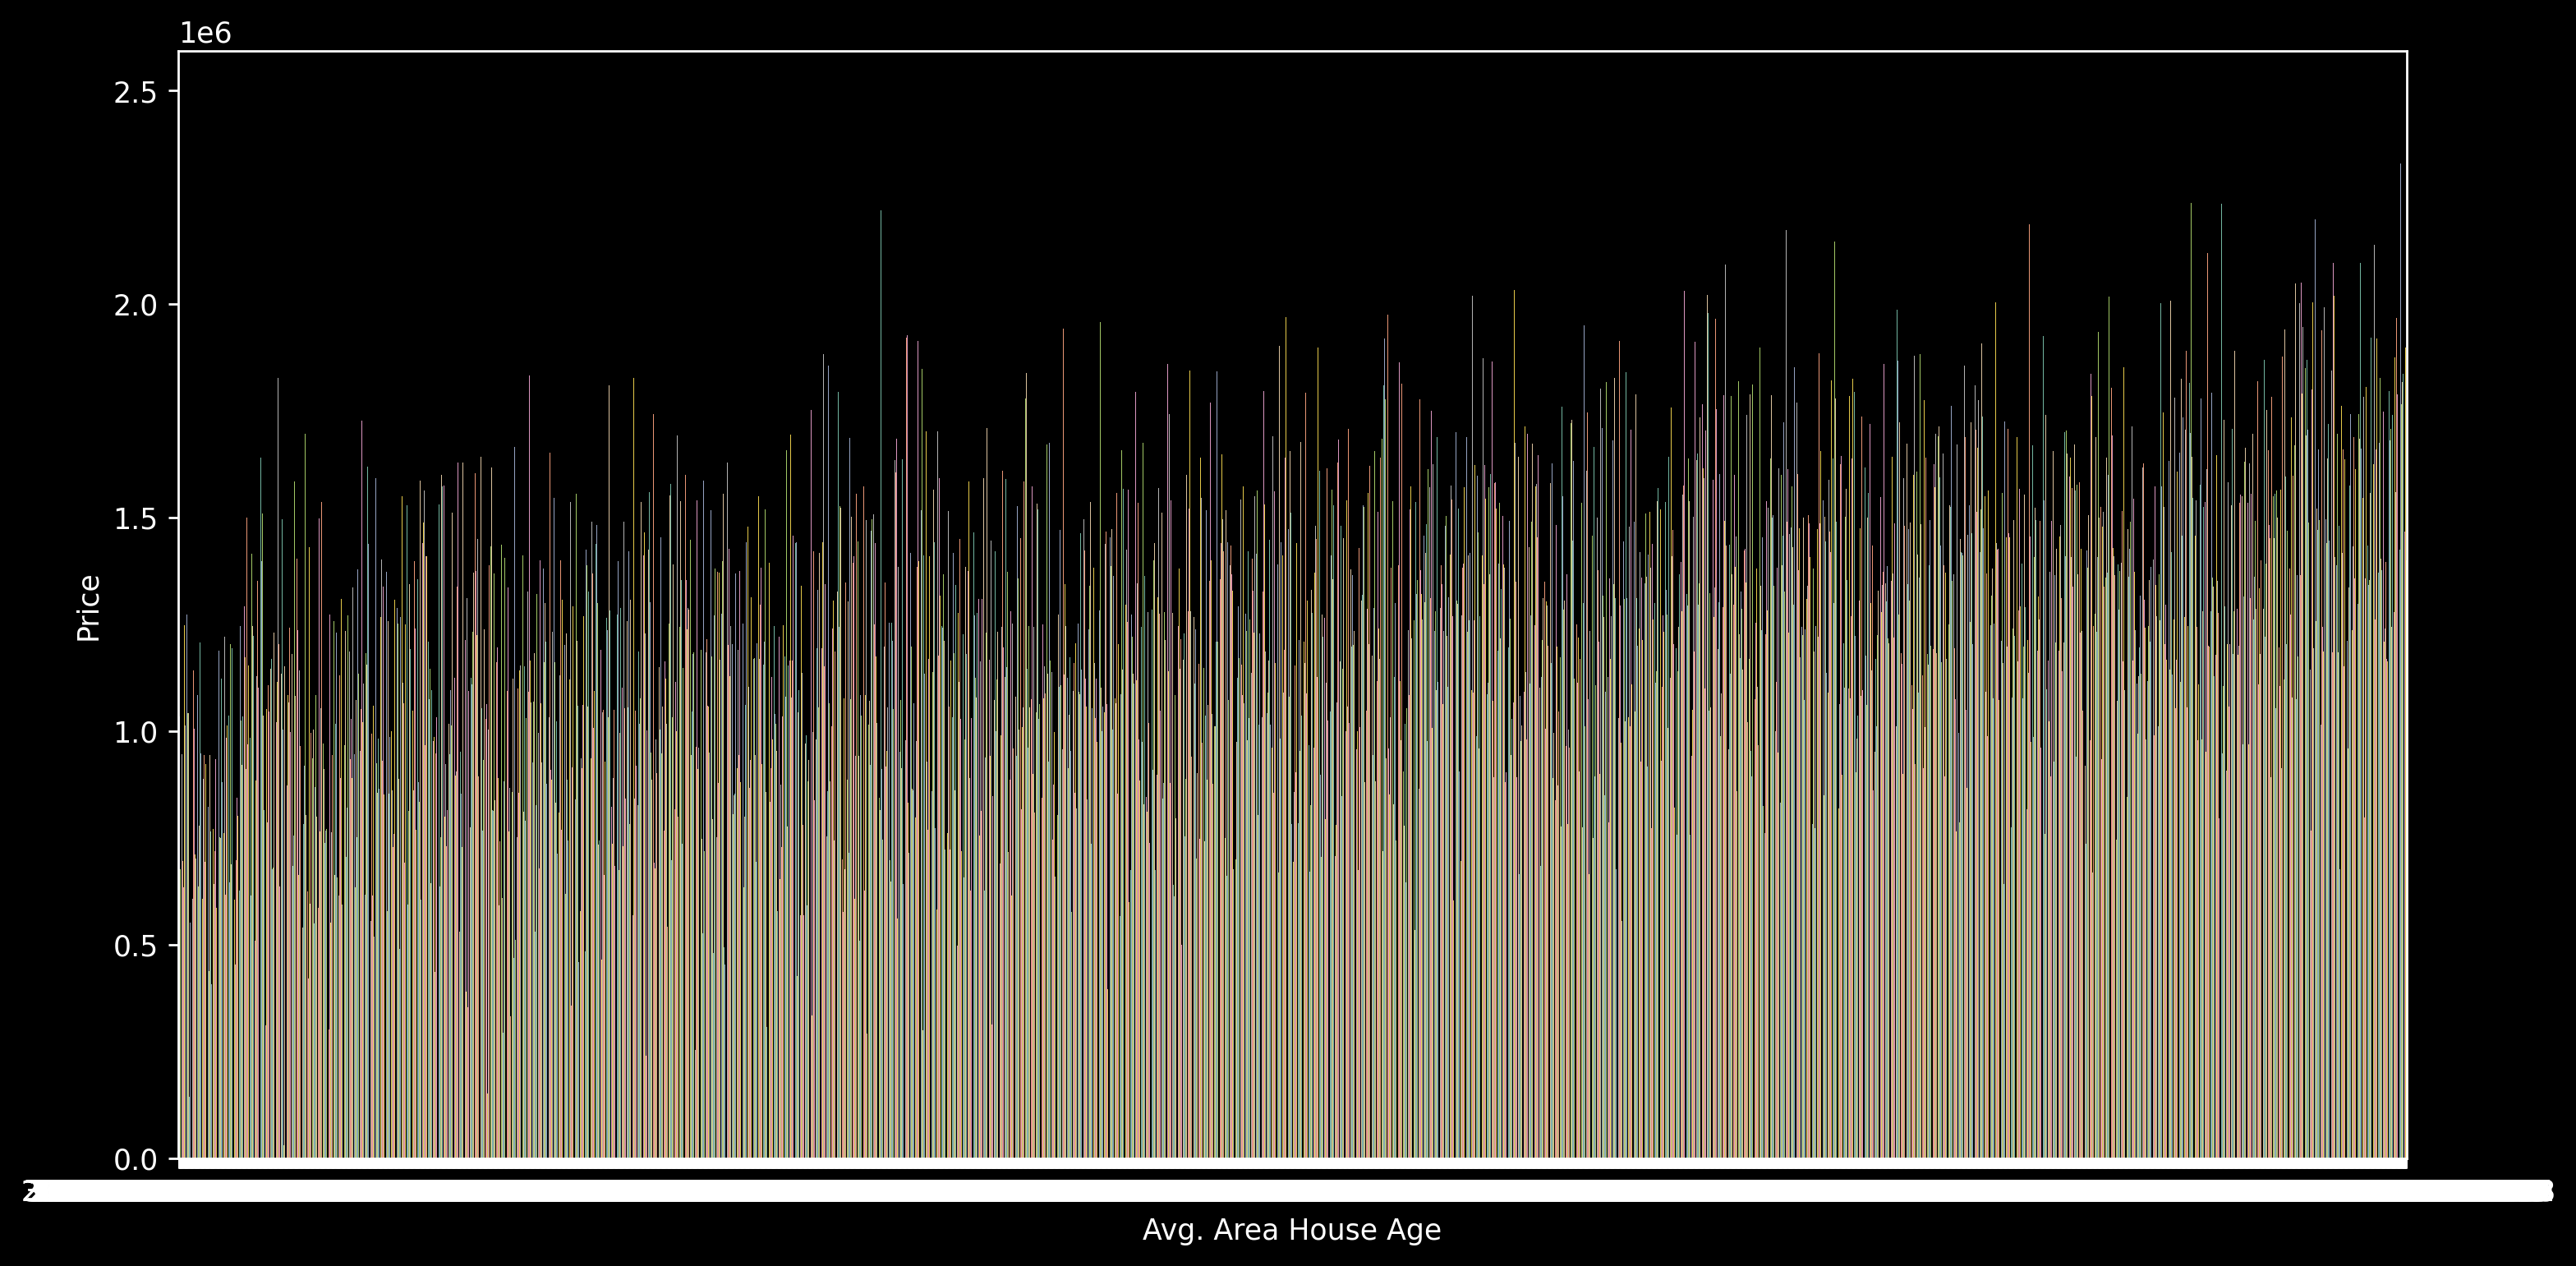

In [10]:
plt.figure(figsize=(14,7), dpi = 250)
sns.barplot(x = 'Avg. Area House Age', y= 'Price', data = df, palette='Set2', ci = None)

C:\Users\ankit\AppData\Local\Temp\ipykernel_23560\2890671867.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Avg. Area House Age', y = 'Price', data = df, palette = 'cool', ci = None)


<Axes: xlabel='Avg. Area House Age', ylabel='Price'>

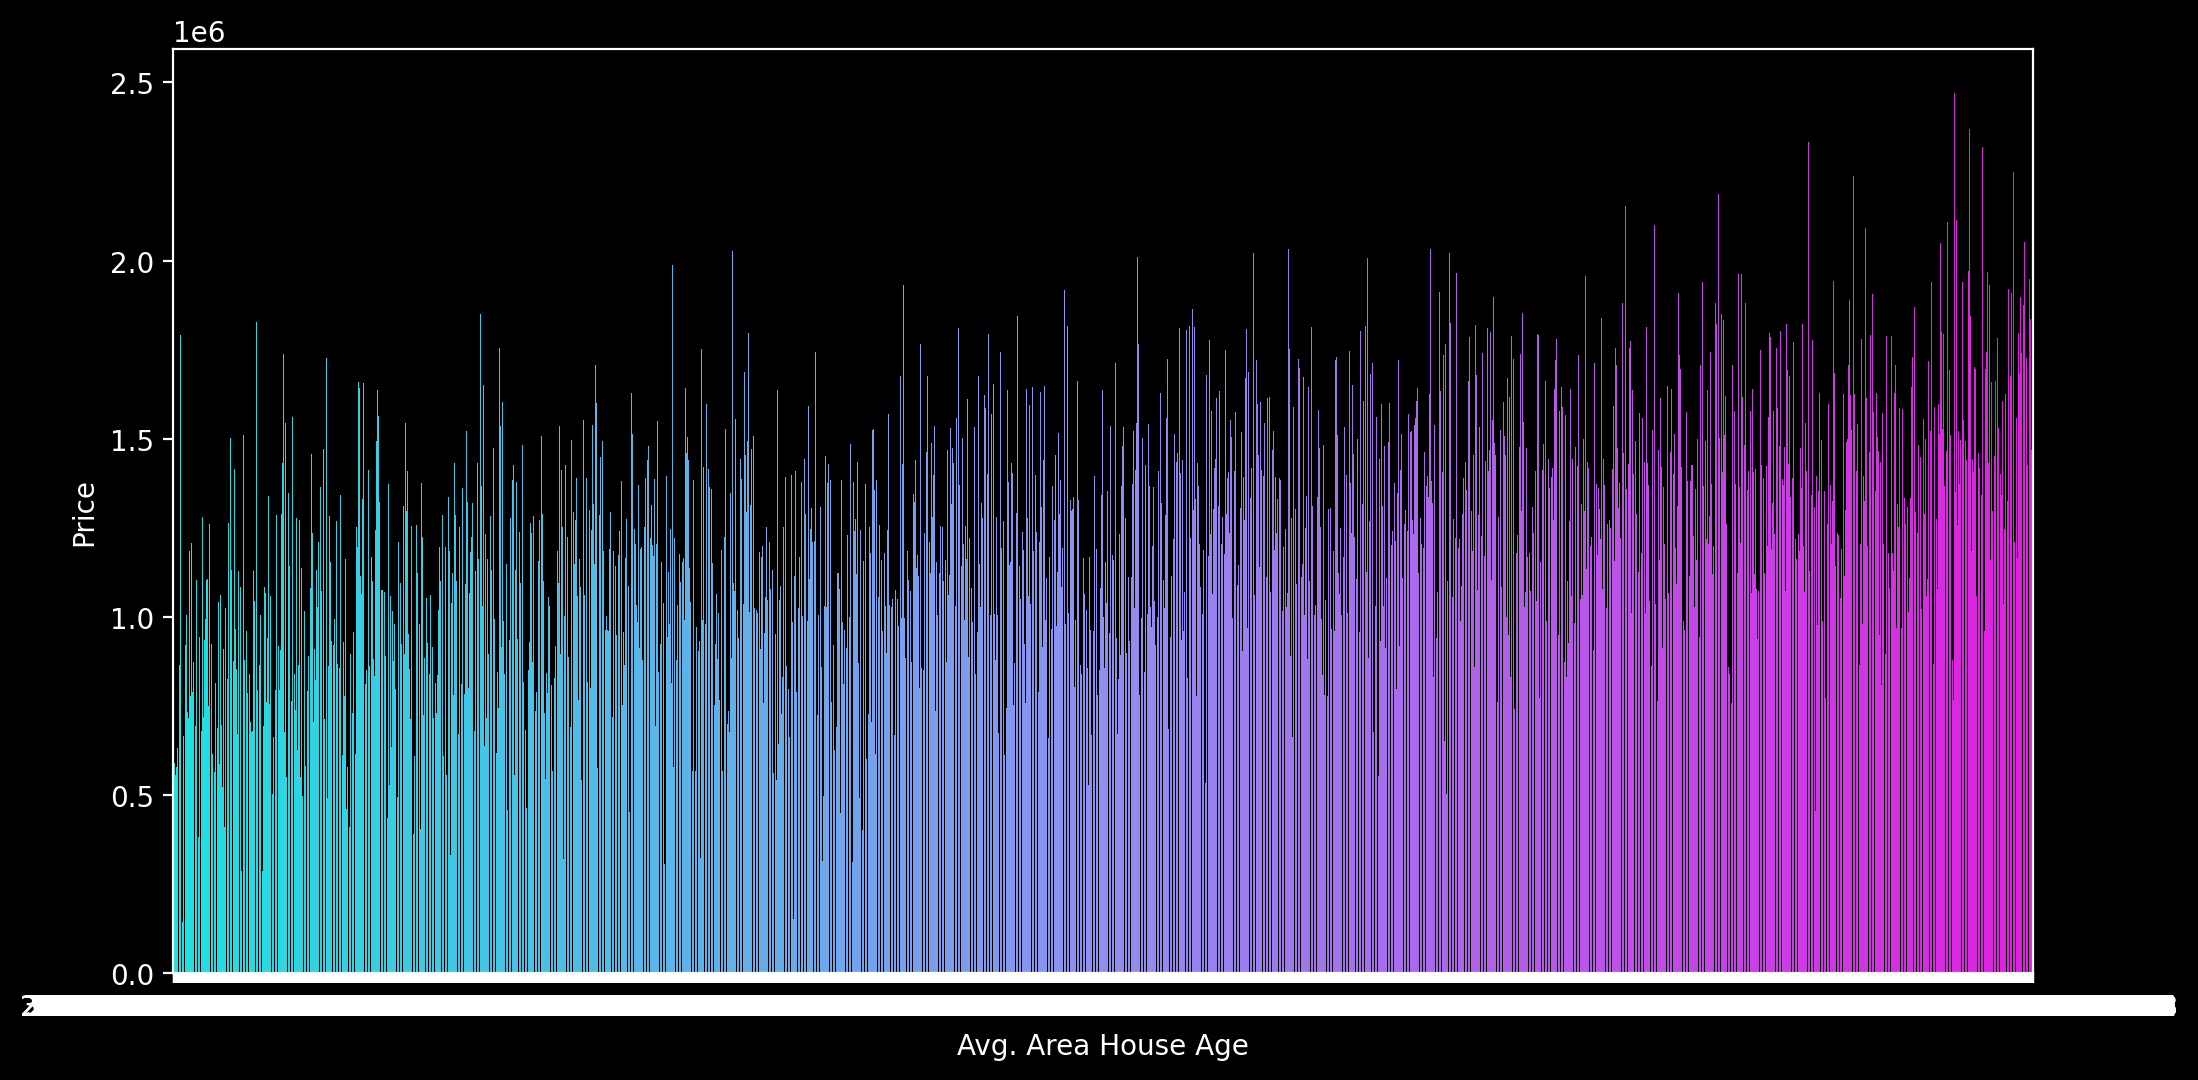

In [11]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Avg. Area House Age', y = 'Price', data = df, palette = 'cool', ci = None)

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

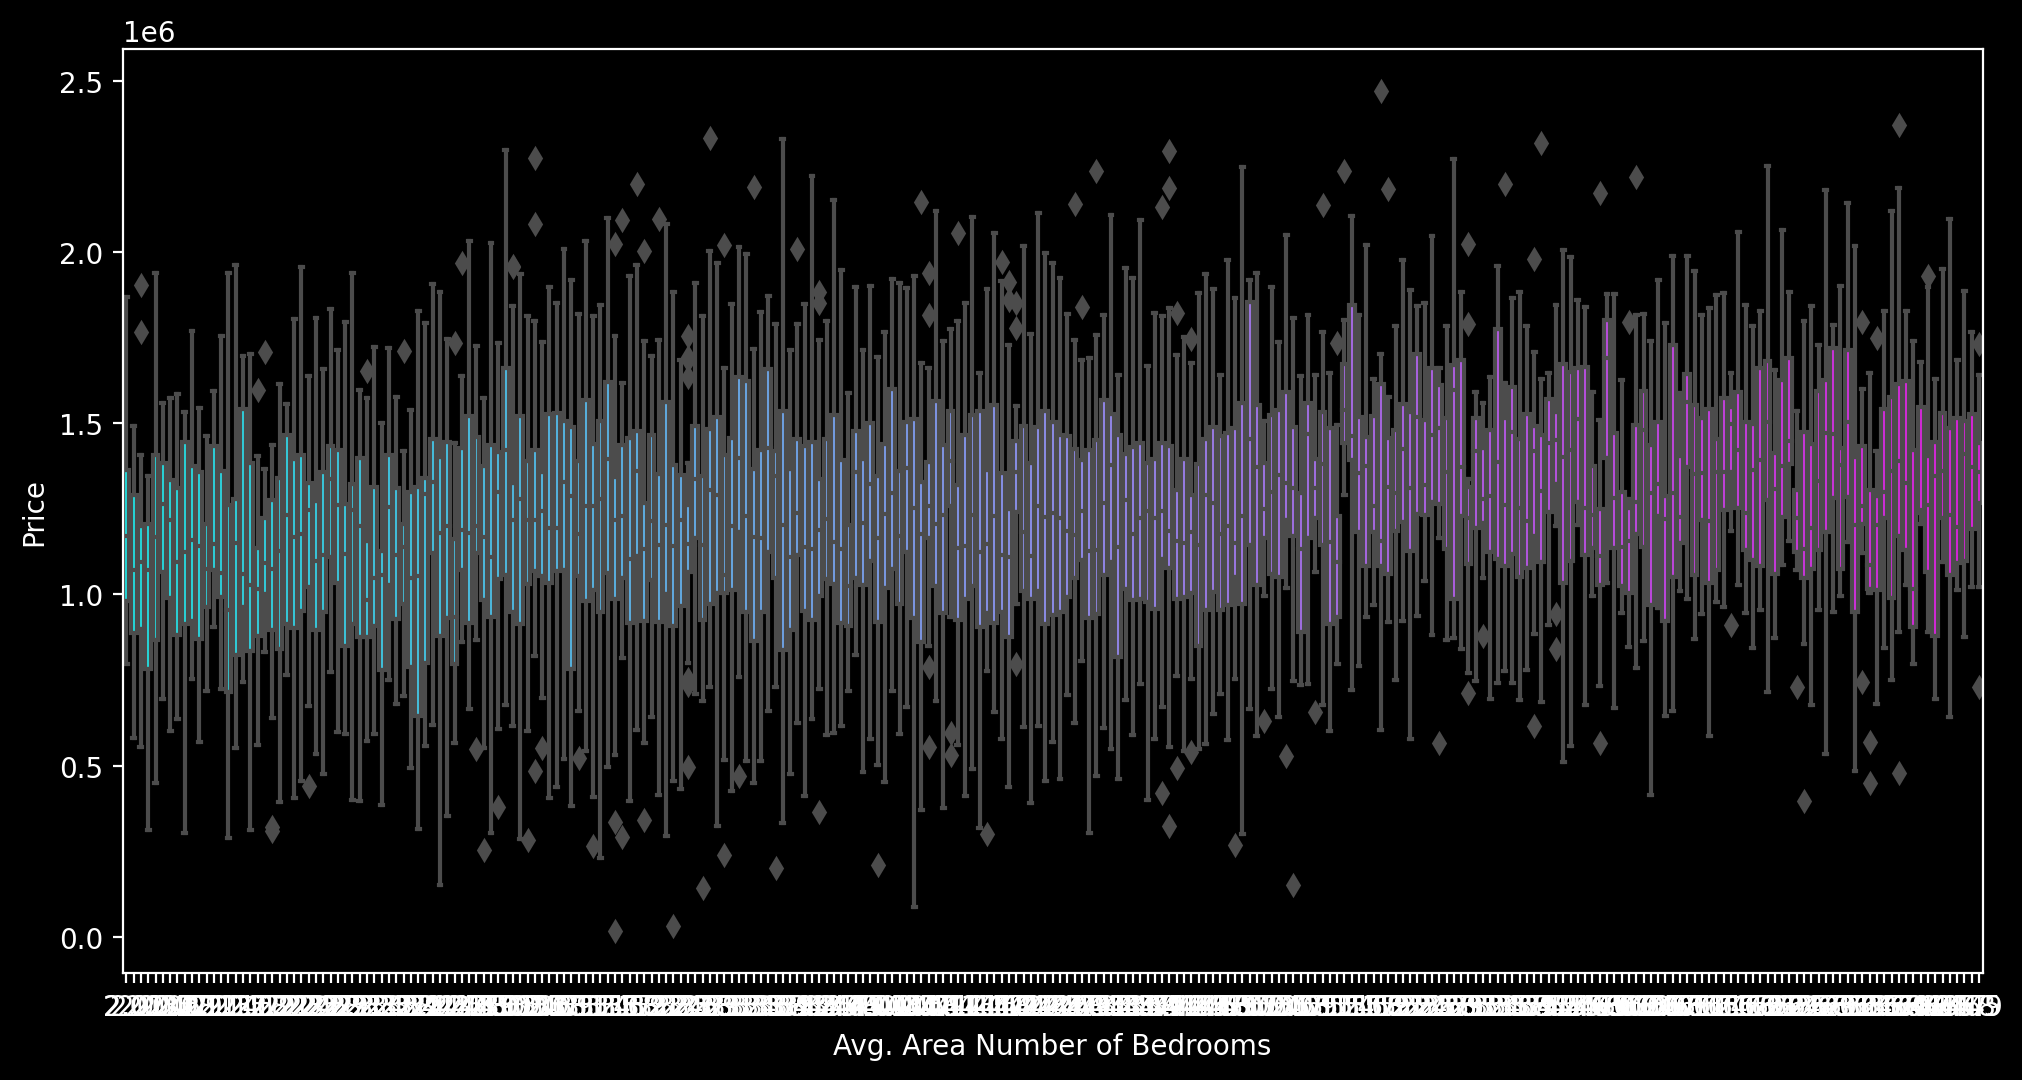

In [12]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.boxplot(x = 'Avg. Area Number of Bedrooms', y = 'Price', data = df, palette = 'cool')

<Axes: xlabel='Area Population', ylabel='Price'>

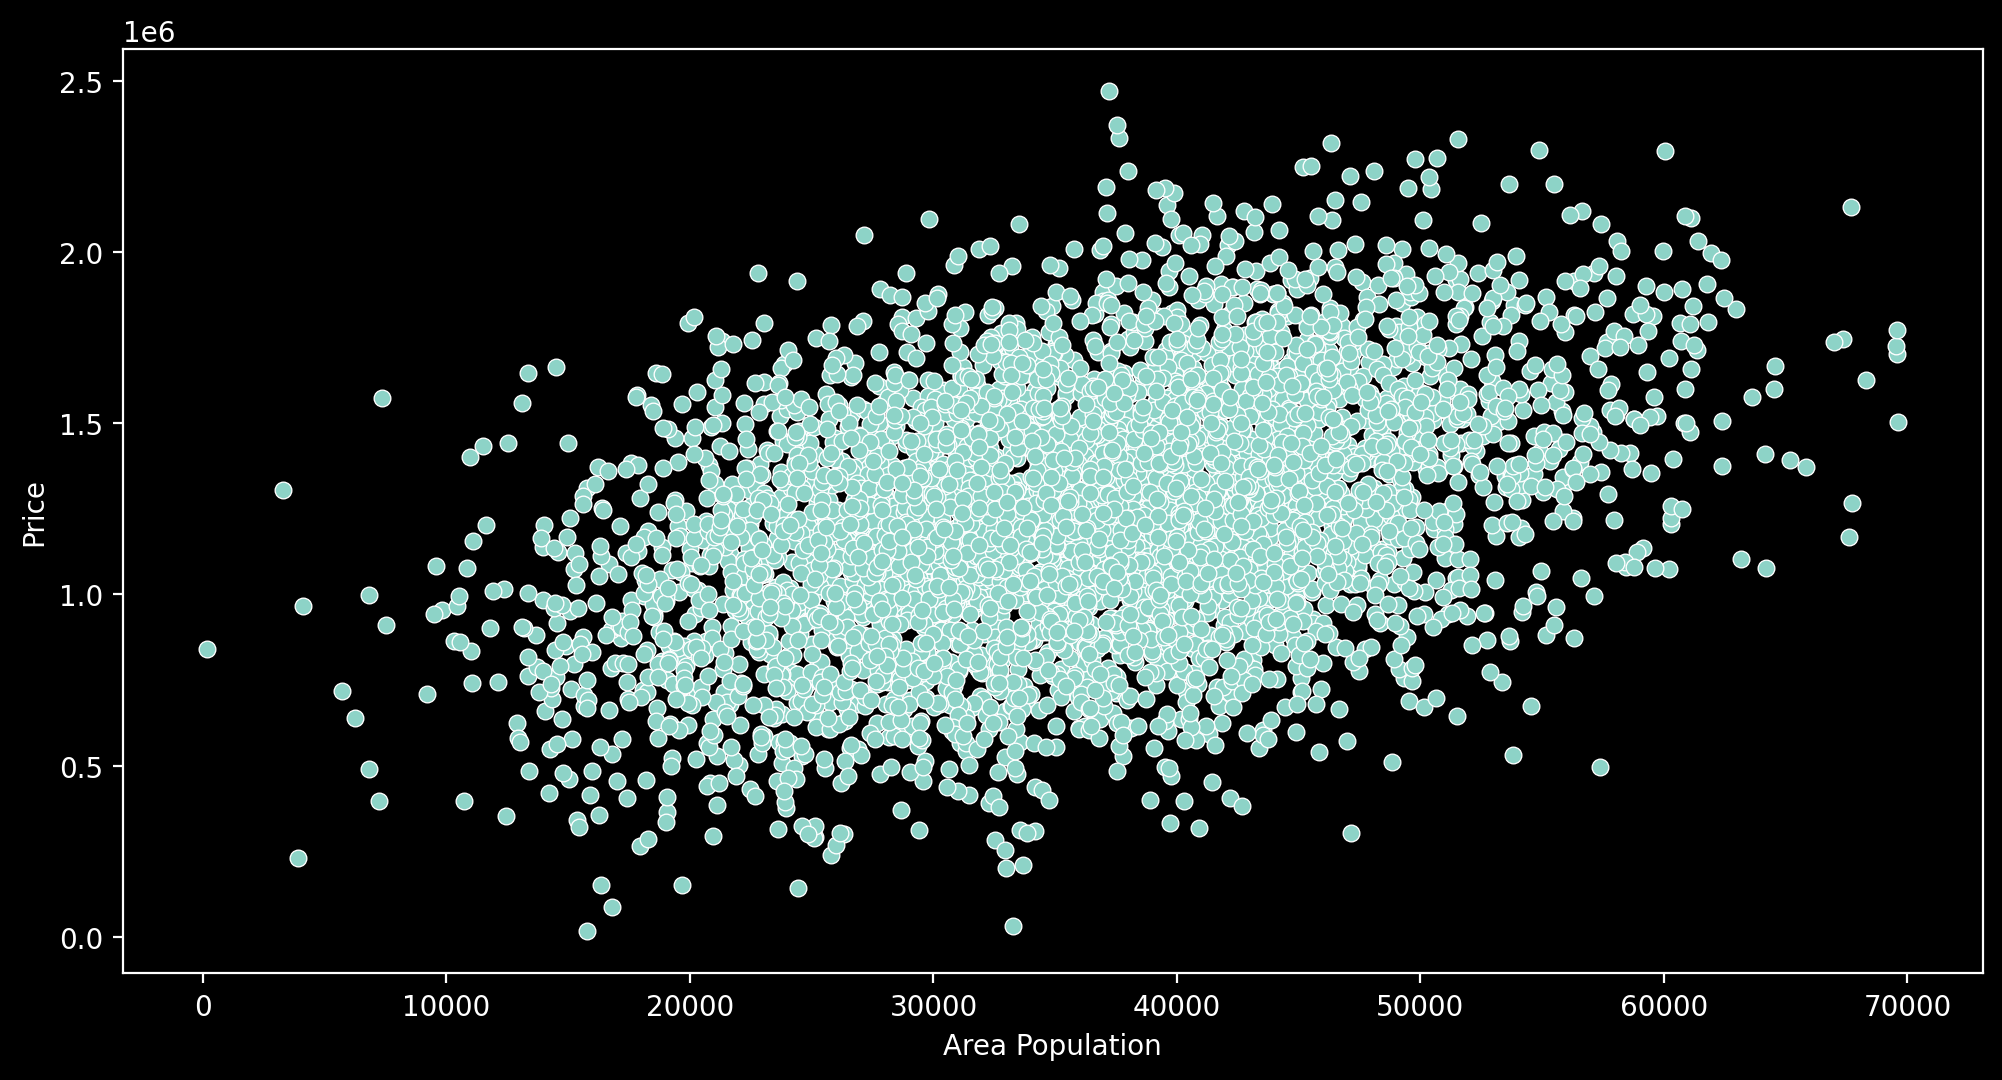

In [13]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(x = 'Area Population', y = 'Price', data = df)

<Axes: >

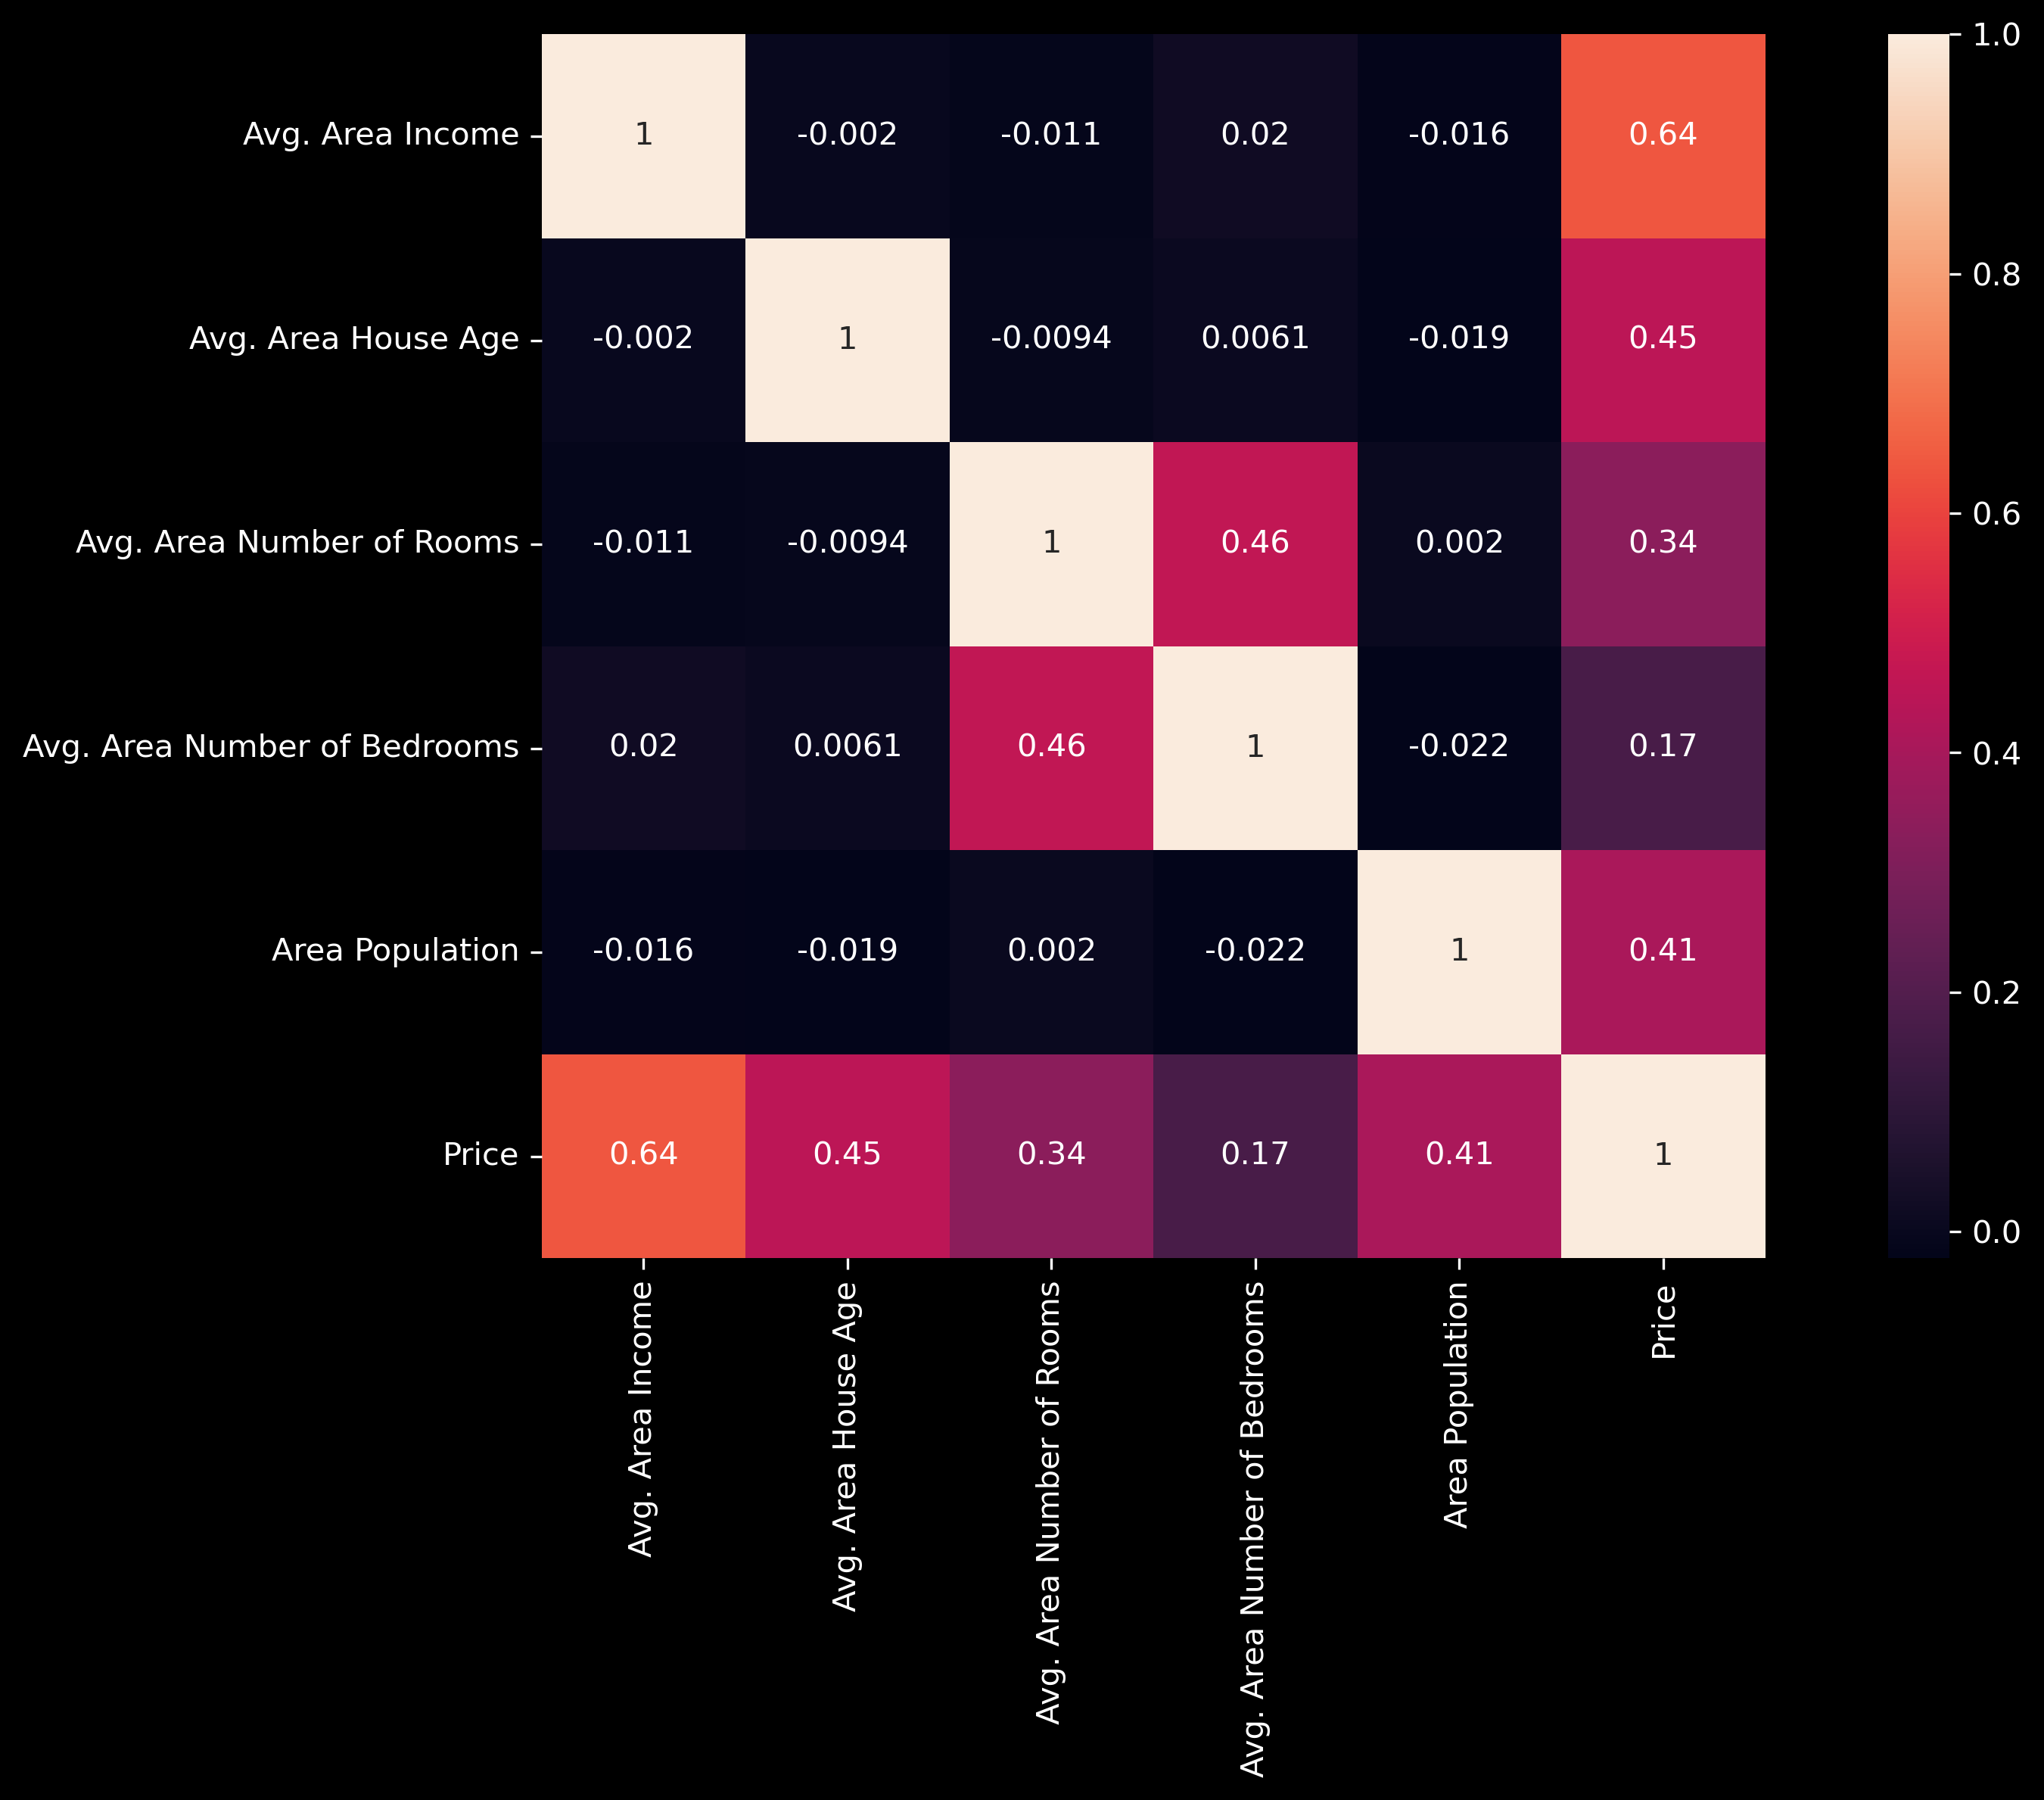

In [14]:
plt.figure(figsize=(14,7), dpi=300)
sns.heatmap(df.corr(), annot=True , square=True)

In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]


Y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.75, random_state=101)

print('Training Data Set  : ', X_train.shape)
print('Training Label Set : ', y_train.shape)
print('Testing Data Set   : ', X_test.shape)
print('Testing Label Set  : ', y_test.shape)


Training Data Set  :  (3750, 5)
Training Label Set :  (3750,)
Testing Data Set   :  (1250, 5)
Testing Label Set  :  (1250,)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:

c = model.intercept_
m = model.coef_[0]

print(f"M:{m}, C:{c}")

M:21.637808338366042, C:-2643144.217581993


In [19]:
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)


In [20]:
print('Training Set Score : ', r2_score(y_train, y_predicted_train))
print('Testing Set Score  : ', r2_score(y_test, y_predicted_test))


Training Set Score :  0.9182890812981098
Testing Set Score  :  0.917062647802057


In [21]:
pickle.dump(model, open('House_Price_prediction.plk','wb'))